In [1]:
import spotipy #Spotify Web API wrapper for python
from spotipy.oauth2 import SpotifyClientCredentials #Auth
import pandas as pd #Dataframe
import time #Pause execution of loops
import matplotlib.pyplot as plt

In [2]:
client_id = "11ff7112cf044de8bb8626fb93505bbc"
client_secret = "551ab8978f3d4ea5a1c57ce762373ae7"

In [3]:
auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret) #Set up Auth for client

In [4]:
sp = spotipy.Spotify(auth_manager = auth_manager)

track_uri = 'spotify:track:5YJtMNWKe55yr49cyJgxva' #Cascada - Everytime we touch
# Track URI :'spotify:track:1SFA5zEVOsLhEg7ynbvQFT' #Illenium Love me a little

In [5]:
track_info = sp.track(track_uri)
track_features = sp.audio_features(track_uri)
track_features

[{'danceability': 0.633,
  'energy': 0.976,
  'key': 8,
  'loudness': -5.362,
  'mode': 1,
  'speechiness': 0.0519,
  'acousticness': 0.00281,
  'instrumentalness': 1.29e-05,
  'liveness': 0.382,
  'valence': 0.493,
  'tempo': 142.027,
  'type': 'audio_features',
  'id': '5YJtMNWKe55yr49cyJgxva',
  'uri': 'spotify:track:5YJtMNWKe55yr49cyJgxva',
  'track_href': 'https://api.spotify.com/v1/tracks/5YJtMNWKe55yr49cyJgxva',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5YJtMNWKe55yr49cyJgxva',
  'duration_ms': 197124,
  'time_signature': 4}]

In [6]:
#Track Info
name = track_info['name']
album = track_info['album']['name']
artist = track_info['album']['artists'][0]['name']
release_date = track_info['album']['release_date']
length = track_info['duration_ms']
popularity = track_info['popularity']

#Track Features
acousticness = track_features[0]['acousticness']
danceability = track_features[0]['danceability']
energy = track_features[0]['energy']
instrumentalness = track_features[0]['instrumentalness']
liveness = track_features[0]['liveness']
loudness = track_features[0]['loudness']
speechiness = track_features[0]['speechiness']
tempo = track_features[0]['tempo']
time_signature = track_features[0]['time_signature']

track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness,
         liveness, loudness, speechiness, tempo, time_signature]
track_columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy',
                 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']

In [7]:
df = pd.DataFrame(track).T.values.tolist() #Transpose Dataframe to list
df

[['Everytime We Touch',
  'Everytime We Touch (Premium Edition)',
  'Cascada',
  '2010-02-12',
  197124,
  68,
  0.00281,
  0.633,
  0.976,
  1.29e-05,
  0.382,
  -5.362,
  0.0519,
  142.027,
  4]]

In [8]:
df_final = pd.DataFrame(df, columns = track_columns)
df_final

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Everytime We Touch,Everytime We Touch (Premium Edition),Cascada,2010-02-12,197124,68,0.00281,0.633,0.976,0.000013,0.382,-5.362,0.0519,142.027,4


In [9]:
track_analysis = sp.audio_analysis(track_uri)

In [19]:
track_meta = track_analysis['meta']
track_bars = track_analysis['bars']
track_beats = track_analysis['beats']
track_tatums = track_analysis['tatums']

In [22]:
track_bars_df = pd.DataFrame(track_bars)
track_beats_df = pd.DataFrame(track_beats)
track_tatums_df = pd.DataFrame(track_tatums)

track_beats_df['exists'] = 1
track_bars_df['exists'] = 1.5
track_tatums_df['exists'] = 0.5

In [23]:
print(f"track bars # of samples: {len(track_bars_df)}")
print(f"track beats # of samples: {len(track_beats_df)}")
print(f"track tatums # of samples: {len(track_tatums_df)}")

track bars # of samples: 115
track beats # of samples: 459
track tatums # of samples: 918


In [24]:
track_beats_df['actual_beat'] = track_beats_df['confidence'].apply(lambda x: 1 if x > .4 else 0)
track_beats_df['base_beat'] = track_beats_df['confidence'].apply(lambda x: 1.5 if x > .5 else 0)

In [25]:
subset_df = track_beats_df[(track_beats_df['start'] >= 25) & (track_beats_df['start'] <= 40)]
subset_df

,start,duration,confidence,exists,actual_beat,base_beat
59,25.24762,0.42439,0.234,1,0,0.0
60,25.67201,0.42021,0.402,1,1,0.0
61,26.09223,0.42018,0.449,1,1,0.0
62,26.51241,0.42242,0.423,1,1,0.0
63,26.93483,0.41862,0.544,1,1,1.5
64,27.35345,0.42274,0.430,1,1,0.0
65,27.77620,0.42498,0.279,1,0,0.0
66,28.20118,0.42270,0.240,1,0,0.0
67,28.62388,0.42080,0.121,1,0,0.0
68,29.04468,0.42042,0.549,1,1,1.5


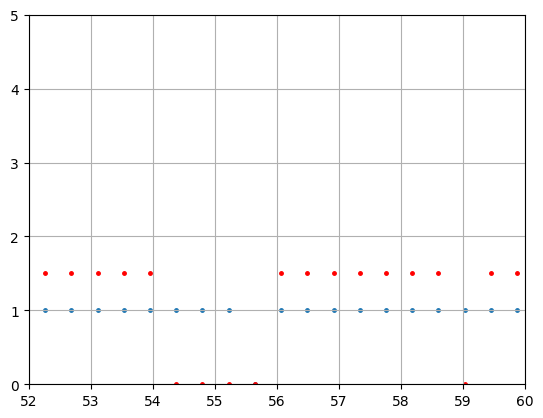

In [26]:
plt.scatter(track_beats_df['start'],track_beats_df['actual_beat'],marker=".", s=25)
plt.scatter(track_beats_df['start'],track_beats_df['base_beat'],marker=".", s=25,c='red')
plt.xlim(52,60)
plt.ylim(0,5)
plt.grid(True)

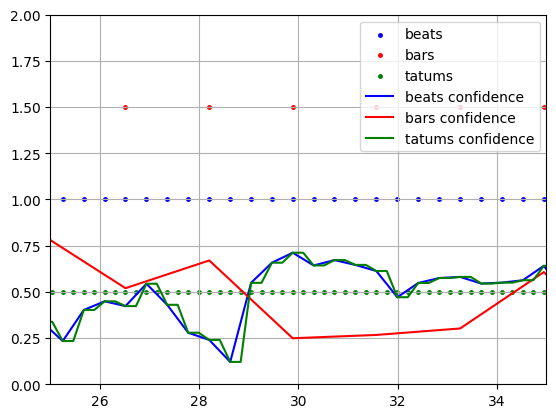

In [38]:
plt.figure()
plt.scatter(track_beats_df['start'], track_beats_df['exists'],marker=".", s=25,c='blue',label='beats')
plt.scatter(track_bars_df['start'], track_bars_df['exists'],marker=".", s=25,c='red',label='bars')
plt.scatter(track_tatums_df['start'], track_tatums_df['exists'],marker=".", s=25,c='green',label='tatums')
plt.plot(track_beats_df['start'], track_beats_df['confidence'],c='blue',label='beats confidence')
plt.plot(track_bars_df['start'], track_bars_df['confidence'],c='red',label='bars confidence')
plt.plot(track_tatums_df['start'], track_tatums_df['confidence'],c='green',label='tatums confidence')
plt.xlim(25,35)
plt.ylim(0,2)
plt.grid(True)
plt.legend()